=== Dataset Preview ===
             timestamp     open     high      low    close    volume  \
0  2018-05-04 22:05:00  0.90139  0.90139  0.90130  0.90130    832.30   
1  2018-05-04 22:06:00  0.90128  0.90139  0.90001  0.90001  23797.63   
2  2018-05-04 22:07:00  0.90001  0.90001  0.89795  0.89808   6978.25   
3  2018-05-04 22:08:00  0.89809  0.90001  0.89808  0.90000  11902.24   
4  2018-05-04 22:09:00  0.90001  0.90001  0.89836  0.90000   5591.10   

   quote_asset_volume  number_of_trades  taker_buy_base_volume  \
0          750.222624               3.0                 784.82   
1        21446.407872              17.0                2994.23   
2         6273.142526              26.0                1932.11   
3        10711.566815              35.0                7972.96   
4         5032.030989              20.0                5589.19   

   taker_buy_quote_volume  target  log_return     sma_5  
0              707.428900     0.0   -0.000100  0.901466  
1             2698.707932     

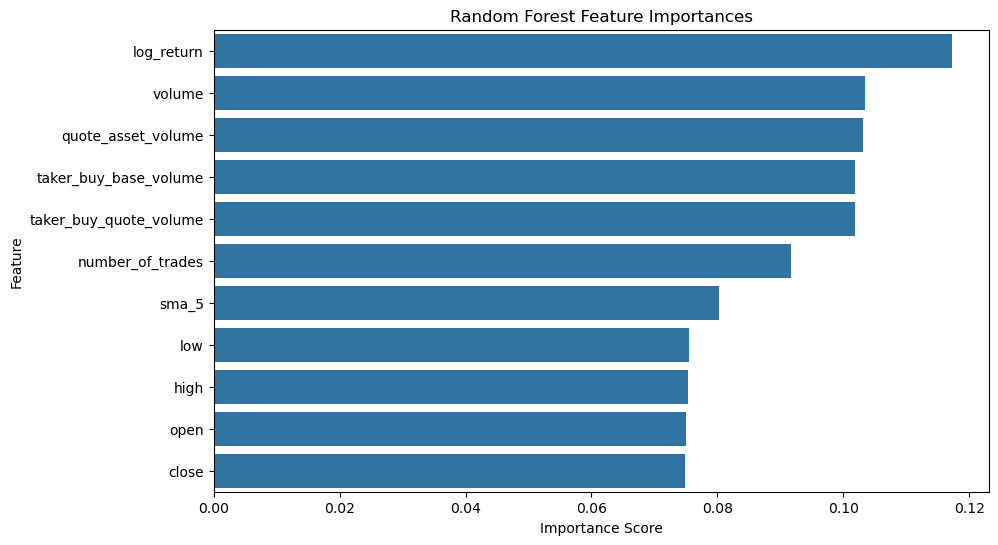


Model saved successfully!


In [3]:
# 02_model_prototyping.ipynb
# --------------------------
# Goal: Quick baseline modeling with a train/val split, random forest, etc.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Step 1: Load a feature-engineered CSV
# Corrected path to the feature-engineered train dataset
df = pd.read_csv("/Users/mchildress/Code/my_crypto_prediction/data/intermediate/train_fe.csv")

# Check a preview of the dataset
print("=== Dataset Preview ===")
print(df.head())

# Step 2: Separate features and target
# Ensure "target" is the classification label (0 or 1)
X = df.drop(columns=["target", "timestamp"], errors="ignore")  # Exclude 'timestamp' if present
y = df["target"]

# Step 3: Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} rows")
print(f"Validation set size: {X_val.shape[0]} rows")

# Step 4: Train a baseline model (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Predict on the validation set
preds = model.predict(X_val)

# Step 6: Compute F1 Score (Macro)
score = f1_score(y_val, preds, average="macro")
print(f"\n=== Validation Macro F1 Score ===\n{score:.4f}")

# Step 7: Feature Importance
importances = model.feature_importances_
feature_names = X_train.columns
sorted_idx = np.argsort(importances)[::-1]

print("\n=== Feature Importances ===")
for idx in sorted_idx:
    print(f"{feature_names[idx]}: {importances[idx]:.4f}")

# Step 8: Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_idx], y=feature_names[sorted_idx])
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Step 9: Save Model (Optional)
import joblib
joblib.dump(model, "/Users/mchildress/Code/my_crypto_prediction/results/models/random_forest_model.pkl")
print("\nModel saved successfully!")